In [1]:
import string

import numpy as np
import proplot
import xarray as xr

import plotting

In [2]:
plotting.configure_style()

In [3]:
ds = xr.open_zarr("simulated_diurnal_cycles.zarr").load()
ds = ds - ds.mean("local_time_bin")  # Remove mean

In [4]:
COLORS = {
    "Fine resolution (year two)": ("#000000", "-"),
    "Baseline": ("#E69F00", "-"),
    "Nudged": ("#56B4E9", "-"),
    "ML-corrected seed 2": ("#009E73", "-"),
}
LABELS = {
    "Fine resolution (year two)": "Fine resolution",
    "Nudged": "Nudged",
    "Baseline": "Baseline",
    "ML-corrected seed 2": "ML-corrected seed 2"
}

In [5]:
rmse = np.sqrt(((ds - ds.sel(configuration="Fine resolution (year two)")) ** 2).mean("local_time_bin"))

In [6]:
def print_rmses(rmse, region, climate):
    order = ["Baseline", "Nudged", "ML-corrected seed 2"]
    r = rmse.precipitation.sel(region=region, climate=climate)
    rmses = [f"{r.sel(configuration=configuration).item():0.1f}" for configuration in order]
    return ", ".join(rmses)

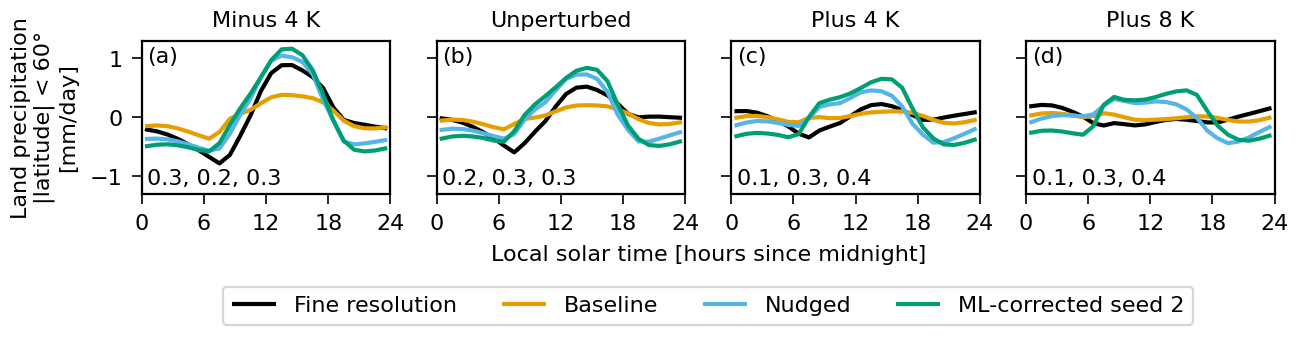

In [7]:
fig, axes = proplot.subplots(ncols=4, nrows=1, refaspect=1/0.618, figwidth=6.5)

for ax, letter, climate in zip(axes, string.ascii_lowercase, ["Minus 4 K", "Unperturbed", "Plus 4 K", "Plus 8 K"]):
    handles = []
    labels = []
    for configuration, (color, style) in COLORS.items():
        h = ds.precipitation.sel(climate=climate, region="land |lat| <= 60", configuration=configuration).plot(ax=ax, color=color, ls=style, add_legend=False)
        handles.append(h)
        labels.append(LABELS[configuration])
    ax.annotate(f"({letter})", xy=(0, 1), xytext=(2, -2), va='top', xycoords='axes fraction', textcoords='offset points')
    ax.set_title(climate)
    ax.set_xlabel("Local solar time [hours since midnight]")
    ax.set_ylabel(u"Land precipitation\n|latitude| < 60°\n[mm/day]")
    ax.set_xticks(np.arange(0, 25, 6))
    ax.set_xlim(0, 24)
    ax.set_ylim(-1.3, 1.3)
    
    ax.annotate(print_rmses(rmse, "land |lat| <= 60", climate), xy=(0, 0), xytext=(2, 2), va='bottom', xycoords='axes fraction', textcoords='offset points')
    
fig.legend(handles, labels, loc="bottom", ncol=4)
fig.savefig("figures/figure-09.png", dpi=200)
fig.savefig("figures/figure-09.pdf")